# Capacitor de placas paralelas

Ejemplo obtenido de: https://comphysblog.wordpress.com/2018/08/12/fenics-simple-2d-electrostatic-boundary-value-problems/

Solo es el espacio dentro de las placas del capacitor

Solving linear variational problem.


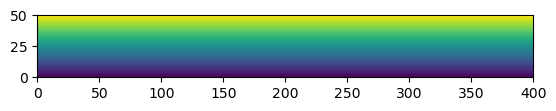

In [1]:
import fenics as fn

box_width = 400
box_height = 50

mesh = fn.RectangleMesh(fn.Point(0, 0),
		fn.Point(box_width, box_height),
		80, 10)

V = fn.FunctionSpace(mesh, 'P', 1)

vtk_file = fn.File('output/mesh.pvd')
vtk_file << mesh

v_1 = fn.Constant(5.0)
v_0 = fn.Constant(1.0)

def bottom_side(x, on_boundary):
	if fn.near(x[1], 0) and on_boundary:
		return True

def top_side(x, on_boundary):
	if fn.near(x[1], box_height) and on_boundary:
		return True

bot_bc = fn.DirichletBC(V, v_0, bottom_side)
top_bc = fn.DirichletBC(V, v_1, top_side)
bcs = [top_bc, bot_bc]

u = fn.TrialFunction(V)
v = fn.TestFunction(V)
f = fn.Constant(0)
a = fn.dot(fn.grad(u), fn.grad(v))*fn.dx
L = f*v*fn.dx

u = fn.Function(V)
fn.solve(a == L, u, bcs)

potential = fn.File('output/electric_potential.pvd')
potential << u

E = - fn.grad(u)
field = fn.File('output/electric_field.pvd')
field << fn.project(E)

fn.plot(u)


# Capacitor de placas paralelas con espacio exterior e interior

Las placas del capacitor son muy delgadas

Solving linear variational problem.


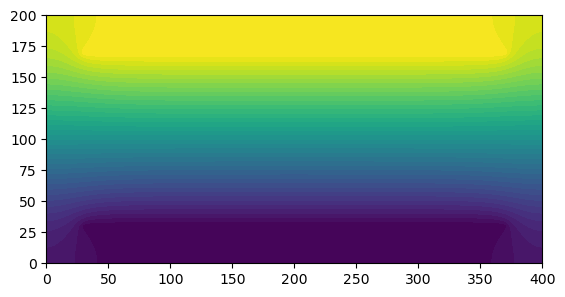

In [2]:
box_width = 400
box_height = 200

mesh = fn.RectangleMesh(fn.Point(0, 0),
		fn.Point(box_width, box_height), 
		400,200) # Estas dos entradas sirven para establecer la densidad del mallado

#fn.plot(mesh)		# Para ver el mallado


V = fn.FunctionSpace(mesh, 'P', 1) # Funcion de espacio discreto

vtk_file = fn.File('output2/mesh.pvd') 
vtk_file << mesh

v_1 = fn.Constant(5.0) # Condicion de frontera placa superior
v_0 = fn.Constant(1.0) # Condicion de frontera placa inferior

tolerancia_maxima = 1e-3

def bottom_side(x):
	if abs(x[1] - 30.0) < 1e-5:
		if abs(x[0]-tolerancia_maxima) >= 30.0 or abs(x[0]+tolerancia_maxima)>=30.0:
			if abs(x[0]-tolerancia_maxima) <= 370.0 or abs(x[0]+tolerancia_maxima)<=370.0:
				return True

def top_side(x):
	if abs(x[1] - (box_height - 30.0)) < 1e-5:
		if abs(x[0]-tolerancia_maxima) >= 30.0 or abs(x[0]+tolerancia_maxima)>=30.0:
			if abs(x[0]-tolerancia_maxima) <= 370.0 or abs(x[0]+tolerancia_maxima)<=370.0:
				return True


bot_bc = fn.DirichletBC(V, v_0, bottom_side)
top_bc = fn.DirichletBC(V, v_1, top_side)
bcs = [top_bc, bot_bc]

u = fn.TrialFunction(V)
v = fn.TestFunction(V)
f = fn.Constant(0)
a = fn.dot(fn.grad(u), fn.grad(v))*fn.dx
L = f*v*fn.dx

u = fn.Function(V)
fn.solve(a == L, u, bcs)

potential = fn.File('output2/electric_potential.pvd')
potential << u

E = - fn.grad(u)
field = fn.File('output2/electric_field.pvd')
field << fn.project(E)

fn.plot(u)

Solving linear variational problem.


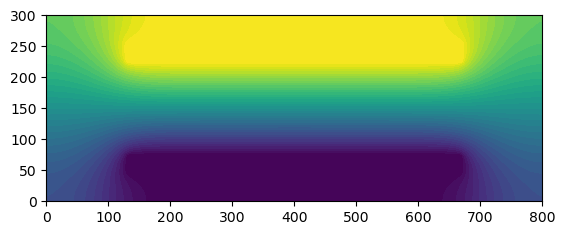

In [3]:
box_width = 800
box_height = 300

mesh = fn.RectangleMesh(fn.Point(0, 0),
		fn.Point(box_width, box_height), 
		600,600) # Estas dos entradas sirven para establecer la densidad del mallado

#fn.plot(mesh)		# Para ver el mallado


V = fn.FunctionSpace(mesh, 'P', 2) # Funcion de espacio discreto

vtk_file = fn.File('output2/mesh.pvd') 
vtk_file << mesh

v_1 = fn.Constant(5.0) # Condicion de frontera placa superior
v_0 = fn.Constant(1.0) # Condicion de frontera placa inferior

tolerancia_maxima = 1e-3

def bottom_side(x):
	if abs(x[1] - 60.0) < 15:
		if abs(x[0]-tolerancia_maxima) >= 130.0 or abs(x[0]+tolerancia_maxima)>=130.0:
			if abs(x[0]-tolerancia_maxima) <= box_width -130.0 or abs(x[0]+tolerancia_maxima)<=box_width -130.0:
				return True

def top_side(x):
	if abs(x[1] - (box_height - 60.0)) < 15:
		if abs(x[0]-tolerancia_maxima) >= 130.0 or abs(x[0]+tolerancia_maxima)>=130.0:
			if abs(x[0]-tolerancia_maxima) <= box_width -130.0 or abs(x[0]+tolerancia_maxima)<=box_width -130.0:
				return True


bot_bc = fn.DirichletBC(V, v_0, bottom_side)
top_bc = fn.DirichletBC(V, v_1, top_side)
bcs = [top_bc, bot_bc]

u = fn.TrialFunction(V)
v = fn.TestFunction(V)
f = fn.Constant(0)
a = fn.dot(fn.grad(u), fn.grad(v))*fn.dx
L = f*v*fn.dx

u = fn.Function(V)
fn.solve(a == L, u, bcs)

potential = fn.File('output2/electric_potential.pvd')
potential << u

E = - fn.grad(u)
field = fn.File('output2/electric_field.pvd')
field << fn.project(E)

fn.plot(u)

# Capacitor de placas paralelas en 3D

In [111]:
from dolfin import *

# Dimensiones de la caja (espacio de simulación)
box_width = 400
box_height = 200
box_depth = 200  # Nueva dimensión en 3D

# Crear la malla en 3D
mesh = BoxMesh(Point(0, 0, 0), Point(box_width, box_height, box_depth), 40, 20, 20)

V = FunctionSpace(mesh, 'P', 1)  # Espacio de funciones para el potencial

# Condiciones de frontera (potenciales de las placas)
v_1 = Constant(5.0)  # Potencial superior
v_0 = Constant(1.0)  # Potencial inferior

tolerancia_maxima = 1e-3

def bottom_plate(x, on_boundary):
    return near(x[2], 30.0, tolerancia_maxima) and (30.0 <= x[0] <= 370.0) and (30.0 <= x[1] <= 170.0)

def top_plate(x, on_boundary):
    return near(x[2], box_depth - 30.0, tolerancia_maxima) and (30.0 <= x[0] <= 370.0) and (30.0 <= x[1] <= 170.0)

bot_bc = DirichletBC(V, v_0, bottom_plate)
top_bc = DirichletBC(V, v_1, top_plate)
bcs = [top_bc, bot_bc]


u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0)  # No hay cargas libres en el espacio

a = dot(grad(u), grad(v)) * dx
L = f * v * dx

u = Function(V)
solve(a == L, u, bcs)


# Guardar el potencial eléctrico
vtk_file = File('output3/electric_potential.pvd')
vtk_file << u

# Calcular el campo eléctrico
E = -grad(u)
W = VectorFunctionSpace(mesh, 'P', 1)  # Espacio de funciones vectorial
E_proj = project(E, W)

# Guardar el campo eléctrico
field = File('output3/electric_field.pvd')
field << E_proj

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
  Solving linear variational problem.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
